In [2]:
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot options
plt.set_cmap("viridis")
sns.set()
sns.set_style("whitegrid")

/opt/anaconda/envs/dage/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda/envs/dage/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

<Figure size 640x480 with 0 Axes>

# DAGE features, source train and target test data

In [4]:
# Load data
X_source = np.load("../runs/dage/dage_digits_features_usps_mnist/uspsmnist_2_20210506072057/test_features.npy")
y_source = np.load("../runs/dage/dage_digits_features_usps_mnist/uspsmnist_2_20210506072057/test_targets.npy")

# Load data
X_target = np.load("../runs/dage/dage_digits_features_usps_mnist/uspsmnist_2_20210506072151/test_features.npy")
y_target = np.load("../runs/dage/dage_digits_features_usps_mnist/uspsmnist_2_20210506072151/test_targets.npy")

In [5]:
X = np.concatenate([X_source, X_target], axis=0)
y = np.concatenate([y_source, y_target], axis=0)

In [6]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape, y.shape

((16461, 2), (16461,))

In [81]:
X_embedded = UMAP(n_components=2).fit_transform(X)
X_embedded.shape, y.shape

((16461, 2), (16461,))

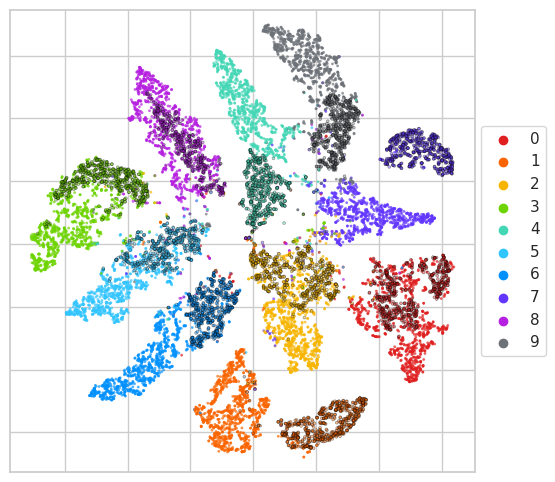

In [8]:
colors = ["#E02020", "#FA6400", "#F7B500", "#6DD400", "#44D7B6", "#32C5FF", "#0091FF", "#6236FF", "#B620E0", "#6D7278"]
palette = sns.color_palette(colors) 
# palette = sns.color_palette("hls", n_colors=10) 
fig = plt.figure(figsize=(6,6))

l = len(X_source)
s = 4

X_emb = X_embedded
# X_emb[:,1] -= 2
# X_emb[:,0] += 2

# Plot target
sns.scatterplot(
    x=X_emb[l:,0],
    y=X_emb[l:,1],
    hue=y[l:],
    linewidth=0,
#     edgecolor="black",
    alpha=0.7,
    palette=palette,
    s=s,
    legend=True,
)

# Plot source
g = sns.scatterplot(
    x=X_emb[:l,0],
    y=X_emb[:l,1],
    hue=y[:l],
    alpha=0.4,
#     linewidth=0,
    linewidth=0.5,
    edgecolor="black",
    color=None,
    palette=palette,
    s=s,
    legend=False,
)

plt.axis("equal")
# plt.xlim([5,34])
# plt.ylim([-24,5])
g.set(xticklabels=[])
g.set(yticklabels=[])

plt.legend(loc='center left', bbox_to_anchor=(0.997, 0.5))

In [9]:
fig.savefig(f"figures/tsne-dage-usps-mnist.pdf", bbox_inches='tight')